<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Outcome Distribution:


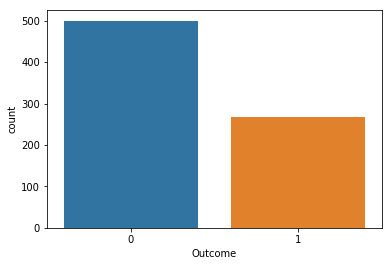

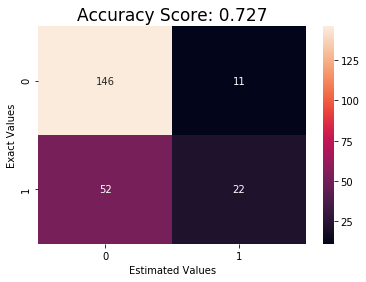

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       157
           1       0.67      0.30      0.41        74

   micro avg       0.73      0.73      0.73       231
   macro avg       0.70      0.61      0.62       231
weighted avg       0.71      0.73      0.69       231



In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[96]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


dataset = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')#veriyi okuyoruz
dataset.info()  #verimizde eksik var mı kontrol ediyoruz.768 verimiz var.Eksiğimiz yok veri sisteminde.

dataset.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

plt.figure(figsize=(6,4))      #burda görselin size ını belirliyoruz.
sns.countplot(dataset['Outcome']) #görselleştirme işlemini seaborn den countplot ile görselleştiriyoruz.
print('Outcome Distribution:') 
dataset['Outcome'].value_counts()  #hedef değişkenin kaçar tane olduğunu öğreniyoruz.
plt.show()  #plot un gösterimi.bu fonksiyonu koymayınca, ikinci sns(confusion matrix) e gelince tabloyu göstermiyor.Confusion matrix yanlış gösteriyor ayrıca.

X = dataset.iloc[:, [1,2,3,4,5,6,7]].values #diğer değişkenleri aldık
y = dataset.iloc[:, 8].values #outcome değeri

 
from sklearn.model_selection import train_test_split #test ve eğitim kısmını belirleme(oran)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #yüzde 30 unu teste ayırdık.geri kalan eğitim

from sklearn.preprocessing import StandardScaler #normalizasyon.ayn birimde değiller diğer değişkenler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.tree import DecisionTreeClassifier #tree classification oluşturma 
classifier = DecisionTreeClassifier(max_depth = 2, random_state=5)
classifier.fit(X_train, y_train) #eğitime geçişi

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

y_pred = classifier.predict(X_test) #confusion matrix oluşumu
score = round(accuracy_score(y_test, y_pred), 3)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Estimated Values')
plt.ylabel('Exact Values')
plt.title('Accuracy Score: {0}'.format(score), size = 17)
plt.show()  #matrisin gösterimi

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))






